<a href="https://colab.research.google.com/github/shipleydm/IS8036_PROJECT/blob/main/IS8036.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Python Packages

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import lightgbm as lgb
from lightgbm import LGBMModel
import xgboost

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import ensemble
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

import scipy
from scipy.sparse import hstack

from google.colab import drive

<IPython.core.display.Javascript object>

Bringing Data In

In [ ]:
drive.mount('/content/drive')

dir = '/content/drive/My Drive/IS8036/AirBnB/DatCleanData'

listing_data=pd.read_csv(dir+'/CLEANLISTINGS.csv')
# review_data=pd.read_csv(dir+'/reviews.csv')
# neighborhood_data=pd.read_csv(dir+'/neighbourhoods.csv')

Mounted at /content/drive


In [ ]:
listing_data.head(5)

<IPython.core.display.Javascript object>

,intListingID,strListingURL,boolInstantlyBookable,boolGuestProfilePicReqToBook,boolVerifiedGuestPhoneReqToBook,dtListingLastScraped,dtListingBookingCalendarLastScraped,dtListingFirstReview,intDaysSinceFirstReview,dtListingLastReview,...,boolHasAirConditioning,boolHasKitchen,boolHasHotWater,boolGuestPetsAllowed,boolHasTV,boolHasPool,boolHasHotTub,boolHasEVCharger,boolHasCable,boolHasInternet
0,10185917,https://www.airbnb.com/rooms/10185917,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1
1,10681596,https://www.airbnb.com/rooms/10681596,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,1,1
2,10886705,https://www.airbnb.com/rooms/10886705,0,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,1,1,0,0,1,1,0,0,0,1
3,11023946,https://www.airbnb.com/rooms/11023946,0,0,0,2020-05-30,2020-05-30,NaN,NaN,NaN,...,1,1,0,0,1,0,0,0,0,1
4,43160258,https://www.airbnb.com/rooms/43160258,1,0,0,2020-05-31,2020-05-31,NaN,NaN,NaN,...,0,1,0,0,1,0,0,0,0,1


In [ ]:
review_data.head(5)

,listing_id,date
0,4952,2009-08-02
1,4952,2009-09-04
2,4952,2009-10-16
3,4952,2009-12-10
4,4952,2010-06-08


In [ ]:
neighborhood_data.head(5)

,neighbourhood_group,neighbourhood
0,NaN,Campbell
1,NaN,Cupertino
2,NaN,Gilroy
3,NaN,Los Altos
4,NaN,Los Altos Hills


In [ ]:
listing_data.dtypes

<IPython.core.display.Javascript object>

intListingID                        int64
strListingURL                      object
boolInstantlyBookable               int64
boolGuestProfilePicReqToBook        int64
boolVerifiedGuestPhoneReqToBook     int64
                                    ...  
boolHasPool                         int64
boolHasHotTub                       int64
boolHasEVCharger                    int64
boolHasCable                        int64
boolHasInternet                     int64
Length: 163, dtype: object

id

listing_url

scrape_id

last_scraped

name

summary

space

description

experiences_offered

neighborhood_overview

notes

transit

access

interaction

house_rules

thumbnail_url

medium_url

picture_url

xl_picture_url

host_id

host_url

host_name

host_since

host_location

host_about

host_response_time

host_response_rate

host_acceptance_rate

host_is_superhost

host_thumbnail_url

host_picture_url

host_neighbourhood

host_listings_count

host_total_listings_count

host_verifications

host_has_profile_pic

host_identity_verified

street

neighbourhood

neighbourhood_cleansed

neighbourhood_group_cleansed

city

state

zipcode

market

smart_location

country_code

country

latitude

longitude

is_location_exact

property_type

room_type

accommodates

bathrooms

bedrooms

beds

bed_type

amenities

square_feet

price

weekly_price

monthly_price

security_deposit

cleaning_fee

guests_included

extra_people

minimum_nights

maximum_nights

minimum_minimum_nights

maximum_minimum_nights

minimum_maximum_nights

maximum_maximum_nights

minimum_nights_avg_ntm

maximum_nights_avg_ntm

calendar_updated

has_availability

availability_30

availability_60

availability_90

availability_365

calendar_last_scraped

number_of_reviews

number_of_reviews_ltm

first_review

last_review

review_scores_rating

review_scores_accuracy

review_scores_cleanliness

review_scores_checkin

review_scores_communication

review_scores_location

review_scores_value

requires_license

license

jurisdiction_names

instant_bookable

is_business_travel_ready

cancellation_policy

require_guest_profile_picture

require_guest_phone_verification

calculated_host_listings_count

calculated_host_listings_count_entire_homes

calculated_host_listings_count_private_rooms

calculated_host_listings_count_shared_rooms

reviews_per_month

Cleaning/EDA/T-tests

Linear Regression

## Narrowing Down Predictors and Exploring

In [83]:
# reading the csv file using read_csv
# storing the data frame in variable called df
df = pd.read_csv(dir+'/KeepingColumns.csv', encoding="ISO-8859-1")
 
# creating a list of column names by
# calling the .columns
list_of_columns_to_keep = list(df.columns)
 
# displaying the list of column names
# print(list_of_columns_to_keep)

<IPython.core.display.Javascript object>

In [84]:
listing_df = listing_data.loc[:, list_of_columns_to_keep]
listing_df.info()

<IPython.core.display.Javascript object>

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 93 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   boolInstantlyBookable                        7221 non-null   int64  
 1   boolGuestProfilePicReqToBook                 7221 non-null   int64  
 2   boolVerifiedGuestPhoneReqToBook              7221 non-null   int64  
 3   intDaysSinceFirstReview                      5912 non-null   float64
 4   intDaysSinceLastReview                       5912 non-null   float64
 5   intDaysSinceLastBookingCalendarUpdate        7162 non-null   float64
 6   cintNeighborhood                             7221 non-null   int64  
 7   cintZipCode                                  7221 non-null   int64  
 8   cintPropertyType                             7221 non-null   int64  
 9   ointRoomType                                 7221 non-null   int64  
 10  

In [ ]:
# Define the columns to drop and the target variable
# going ahead and removing this host info as well, not being used for predictors
remove_cols = ['strHostNeighborhood', 'strHostCity', 'strHostStateProv', 'strHostCountry']
for name in remove_cols:
  if name in list_of_columns_to_keep:
    list_of_columns_to_keep.remove(name)

# final dataset with columns kept
listing_df = listing_df.loc[:, list_of_columns_to_keep]

In [85]:
# model inputs
# predictors = list_of_columns_to_keep       
# target = 'intDailyPrice'

# Split the data into training and test sets
df = listing_df # keep copy of original dataframe without the predictor being dropped
df.drop('intDailyPrice', axis=1)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=41)

df_train.shape

<IPython.core.display.Javascript object>

(5776, 89)

<IPython.core.display.Javascript object>

<ipython-input-88-8d24f42b623c>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


Text(0.5, 1.0, 'Correlation matrix of numerical features')

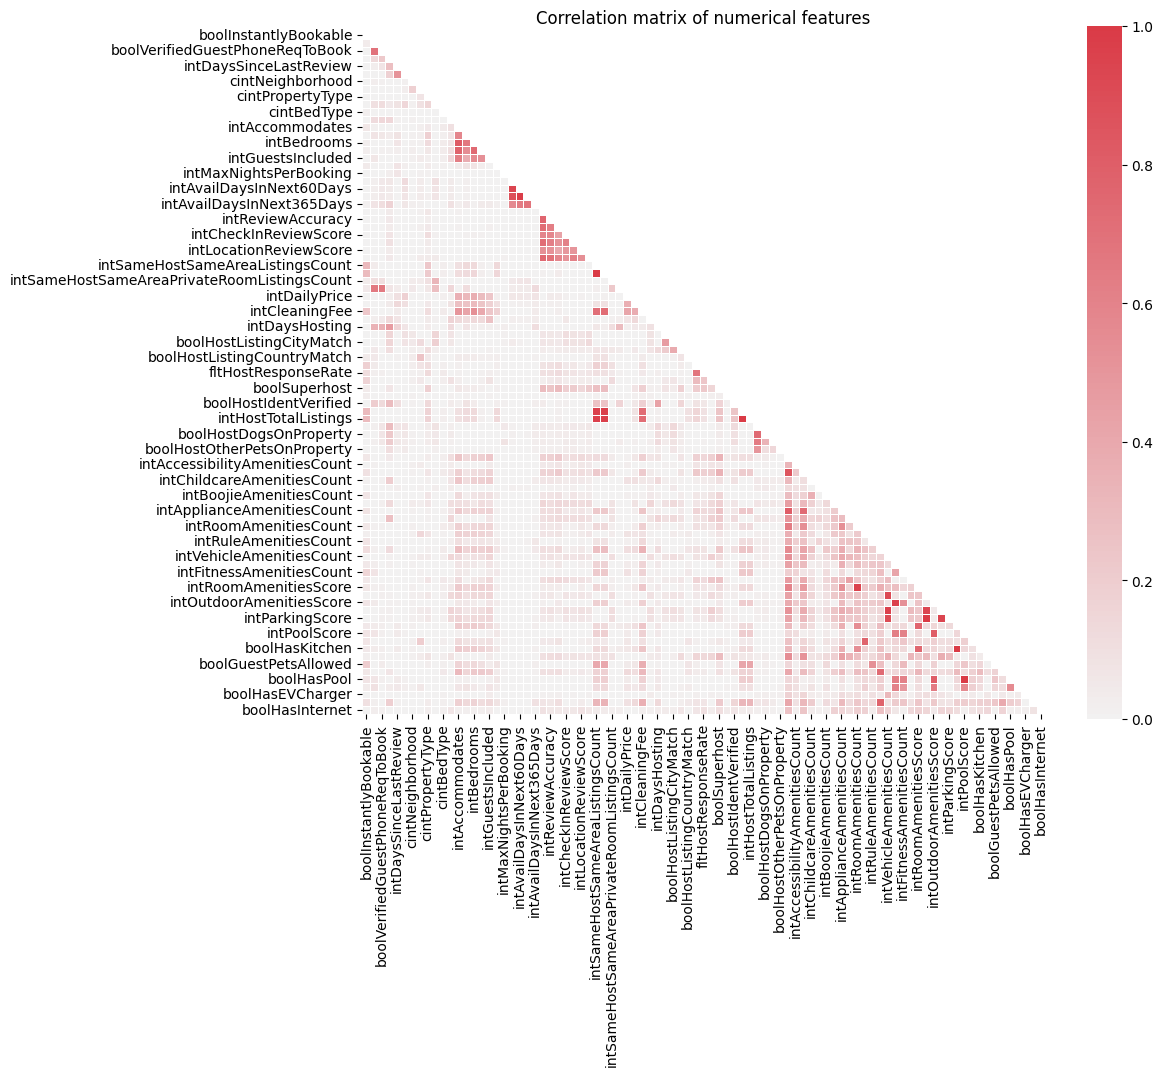

In [88]:
# correlation matrix
corr = df_train.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmin=0, vmax=1.0, square=True, linewidths=.5, cbar_kws={"shrink": 1.0});
plt.title('Correlation matrix of numerical features')

<IPython.core.display.Javascript object>

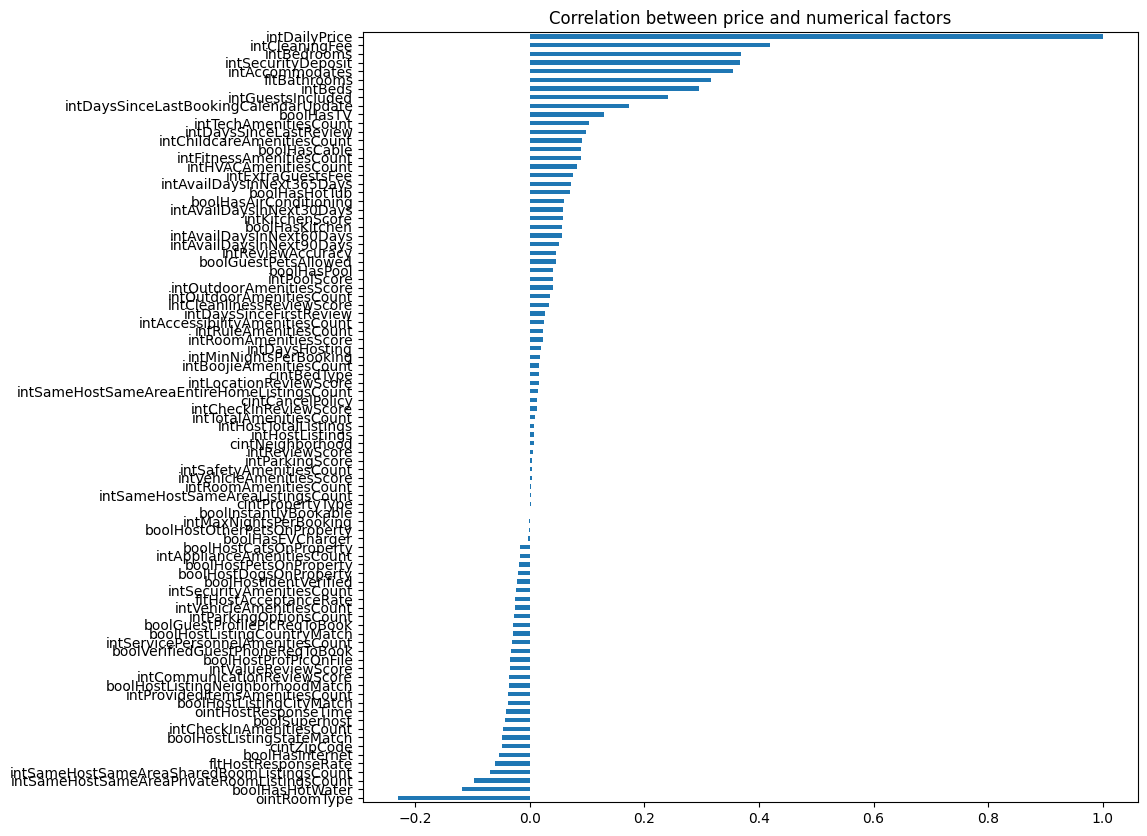

In [89]:
# double check to bring in correct column types
col = df_train.select_dtypes(['float64', 'int', 'int64']).columns

df_train[col].corr() ['intDailyPrice'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10));
plt.title('Correlation between price and numerical factors');

<IPython.core.display.Javascript object>

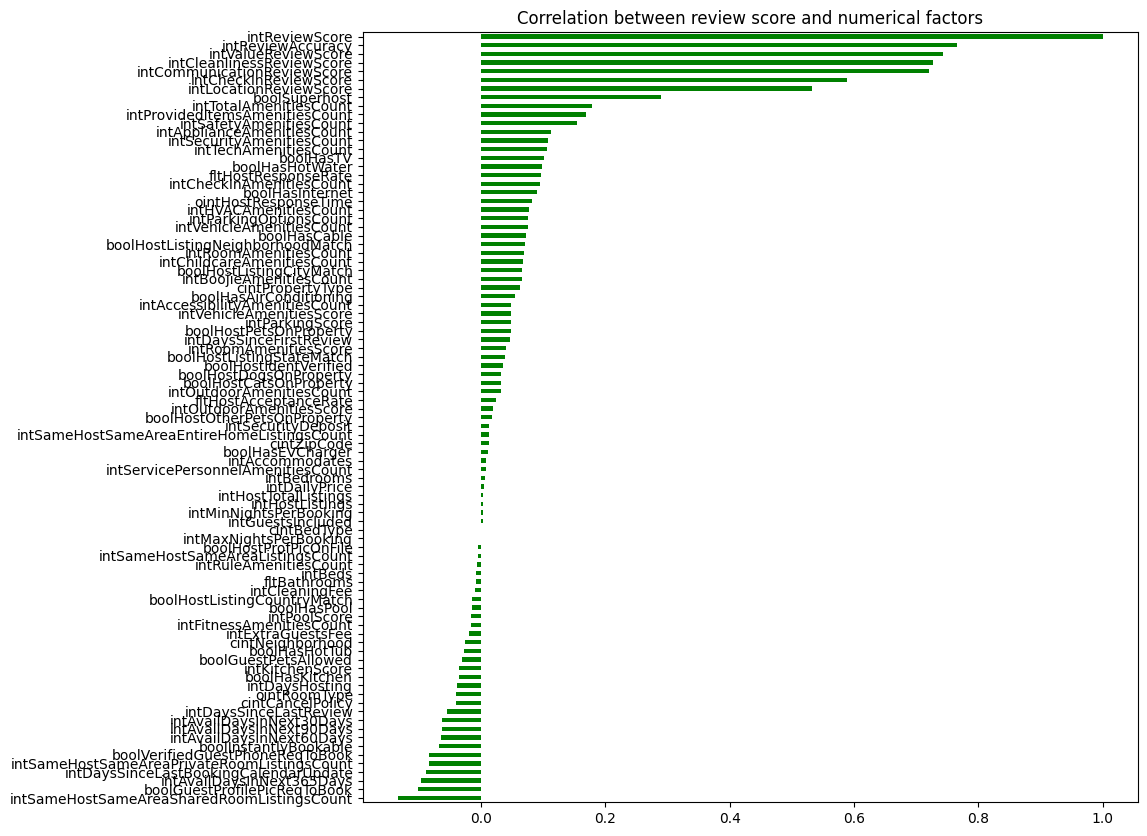

In [90]:
# below is just out of curiosity
df_train[col].corr() ['intReviewScore'].sort_values(ascending=True).dropna().plot(kind='barh', figsize=(10,10), color='green');
plt.title('Correlation between review score and numerical factors');

## Light GPM Model

In [91]:
def model_eval(X_train, y_train, X_test, y_test, model):
    '''
    input: X is features data frame, y is response, model
    output: train cross validation score, test score, predicted values
    
    '''
    model.fit(X_train, np.ravel(y_train))
    y_pred = model.predict(X_test)
    score = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = 5)        # Array of R^2 scores of the estimator for each run of the cross validation.
    test_score = r2_score(y_test, y_pred)                                           # R^2 (coefficient of determination) regression score function.            
    return score, test_score, y_pred

def plot_features(X, model, name):
    '''
    plot features importance of algoritm
    input: dataframe X and regression model
    output: Feature importance plot
    '''
    print("Plot feature importances…")
    headers = ["name", "score"]
    values = sorted(zip(X.columns, model.feature_importances_), key=lambda x: x[1] * -1)
    forest_feature_importances = pd.DataFrame(values, columns = headers)
    forest_feature_importances = forest_feature_importances.sort_values(by = ['score'], ascending = False)
    features = forest_feature_importances['name'][:25]
    y_pos = np.arange(len(features))
    scores = forest_feature_importances['score'][:25]
    #plot feature importances
    plt.figure(figsize=(13,8))
    plt.barh(y_pos, scores, align='center', alpha=0.5, color='red')
    plt.yticks(y_pos, features, rotation=0)   
    plt.ylabel('Features')
    plt.xlabel('Score')
    plt.title('Feature importances ' + name)
    plt.show()

<IPython.core.display.Javascript object>

In [92]:
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train[col]
X_test = df_test[col]
Y = df_train['intDailyPrice']
Y_test = df_test['intDailyPrice']

<IPython.core.display.Javascript object>

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [93]:
model_lgb = lgb.LGBMRegressor(boosting_type ='gbdt', learning_rate = 0.1, num_leaves=31, max_depth =8) 
score, test_score, y_pred_lgbm = model_eval(X, Y, X_test, Y_test, model_lgb)

print('Number of columns is:', df_test.shape[1])
# print(df_test.columns)
print('\n')
print('LGBM Model:')
print('- Mean of crossvalidation scores:', np.mean(score))
print('- r2_score:', test_score)

<IPython.core.display.Javascript object>

Number of columns is: 89


LGBM Model:
- Mean of crossvalidation scores: 0.4703167499636411
- r2_score: 0.7441132046550835


<IPython.core.display.Javascript object>

Plot feature importances…


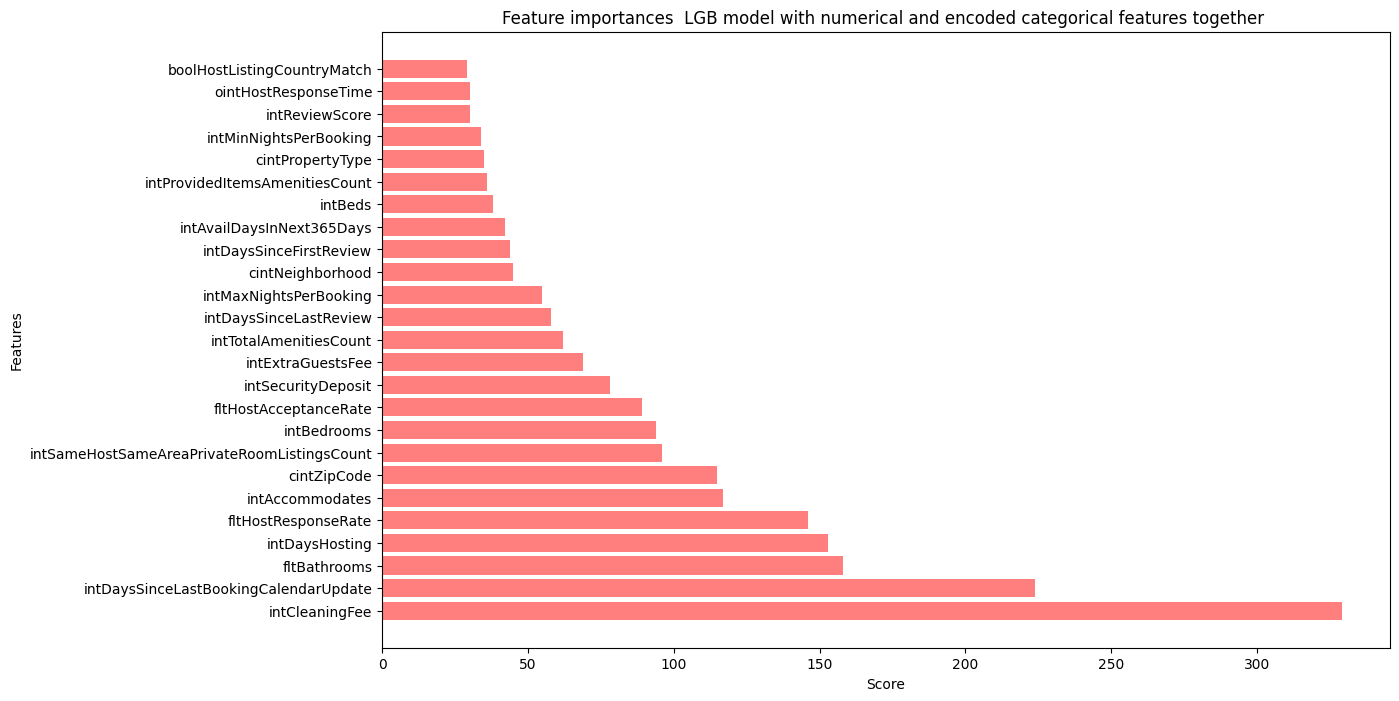

In [94]:
plot_features(X, model_lgb, " LGB model with numerical and encoded categorical features together ")

## Random Forest Model

In [105]:
# drop nulls, can handle a different way if needed, but we don't have many nulls
df_train = df_train.dropna()
df_test = df_test.dropna()

<IPython.core.display.Javascript object>

In [106]:
# get data ready for model inputs
exc =  ['intDailyPrice']

col = [i for i in col if i not in exc]
print('Number of columns is:', len(col))
print(col)

X = df_train[col]
X_test = df_test[col]
Y = df_train['intDailyPrice']
Y_test = df_test['intDailyPrice']

<IPython.core.display.Javascript object>

Number of columns is: 88
['boolInstantlyBookable', 'boolGuestProfilePicReqToBook', 'boolVerifiedGuestPhoneReqToBook', 'intDaysSinceFirstReview', 'intDaysSinceLastReview', 'intDaysSinceLastBookingCalendarUpdate', 'cintNeighborhood', 'cintZipCode', 'cintPropertyType', 'ointRoomType', 'cintBedType', 'cintCancelPolicy', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intBeds', 'intGuestsIncluded', 'intMinNightsPerBooking', 'intMaxNightsPerBooking', 'intAvailDaysInNext30Days', 'intAvailDaysInNext60Days', 'intAvailDaysInNext90Days', 'intAvailDaysInNext365Days', 'intReviewScore', 'intReviewAccuracy', 'intCleanlinessReviewScore', 'intCheckInReviewScore', 'intCommunicationReviewScore', 'intLocationReviewScore', 'intValueReviewScore', 'intSameHostSameAreaListingsCount', 'intSameHostSameAreaEntireHomeListingsCount', 'intSameHostSameAreaPrivateRoomListingsCount', 'intSameHostSameAreaSharedRoomListingsCount', 'intSecurityDeposit', 'intCleaningFee', 'intExtraGuestsFee', 'intDaysHosting', 'boolHos

In [107]:
# model
model = RandomForestRegressor(n_estimators=100,                
                              #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                               random_state=3, 
                               n_jobs=-1)
score, test_score, y_pred = model_eval(X, Y, X_test, Y_test, model)
print('\n')
print('Scenario RF with broad set of selected features:')
print('- Mean of crossvalidation scores:', np.mean(score))
print('- r2_score:', test_score)

<IPython.core.display.Javascript object>



Scenario RF with broad set of selected features:
- Mean of crossvalidation scores: 0.5373605758986407
- r2_score: 0.6709343334390803


<IPython.core.display.Javascript object>

Plot feature importances…


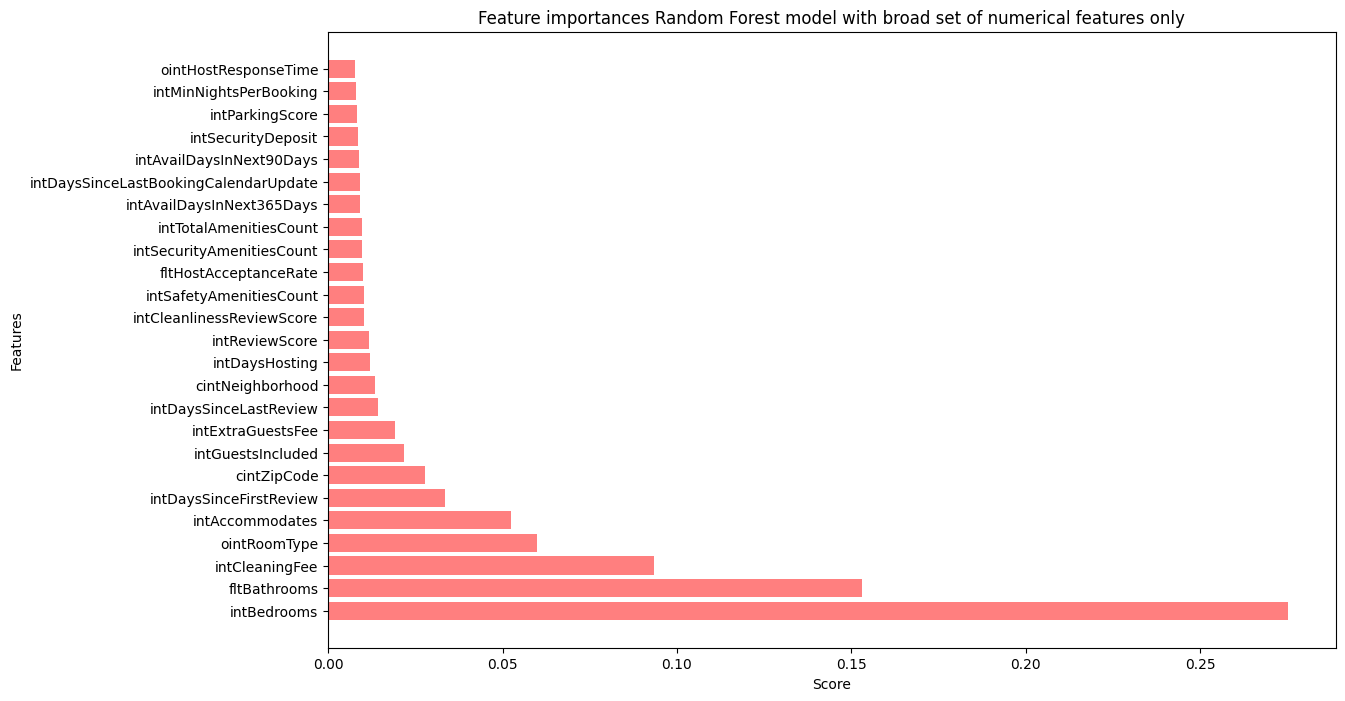

In [109]:
plot_features(X, model, "Random Forest model with broad set of numerical features only")

In [116]:
#remove lowest importance values and some of highly correlated, until we have the best result at the end
exc=  ['intAccommodates', 'ointRoomType', 'intCleaningFee', 'fltBathrooms', 'intBedrooms', 'intGuestsIncluded', 'cintZipCode', 'intDaysSinceFirstReview', 'intExtraGuestsFee']

col1 = [i for i in col if i in exc]
print('Number of columns is:', len(col1))
print(col1)
X = df_train[col1]
X_test = df_test[col1]

# model - reduced
model = RandomForestRegressor(n_estimators=100,                
                              #  criterion='mse' - mse is default. Options are: {'squared_error', 'friedman_mse', 'poisson', 'absolute_error'}
                               random_state=3, 
                               n_jobs=-1)
score, test_score, y_pred = model_eval(X, Y, X_test, Y_test, model)
print('\n')
print('Scenario RF with broad set of selected features:')
print('- Mean of crossvalidation scores:', np.mean(score))
print('- r2_score:', test_score)

<IPython.core.display.Javascript object>

Number of columns is: 9
['intDaysSinceFirstReview', 'cintZipCode', 'ointRoomType', 'intAccommodates', 'fltBathrooms', 'intBedrooms', 'intGuestsIncluded', 'intCleaningFee', 'intExtraGuestsFee']


Scenario RF with broad set of selected features:
- Mean of crossvalidation scores: 0.534915405324733
- r2_score: 0.647139260478091


Extreme Gradient Boosting